# Nearest Neighbors Classification -- sklearn

## Load Data

In [1]:
from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split # for splitting the dataset

In [2]:
iris= load_iris(as_frame=True) # convert to pandas dataframe 
X = iris.data[["sepal length (cm)", "sepal width (cm)"]] 
y = iris.target
# 20% of the data will be used for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # split the dataset into training and testing sets

# Preprocessing Data 

In [3]:
from sklearn.neighbors import KNeighborsClassifier # import the KNN classifier
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler 

In [4]:
clf = Pipeline(steps = [
    ("scaler", StandardScaler()), 
    ("knn", KNeighborsClassifier(n_neighbors=11))
])

## Dcision Boundary 

In [5]:
import matplotlib.pyplot as plt
from  sklearn.inspection import DecisionBoundaryDisplay

d:\Anaconda\Lib\site-packages\sklearn\inspection\_plot\decision_boundary.py:194: UserWarning: The following kwargs were not used by contour: 'shading'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)
d:\Anaconda\Lib\site-packages\sklearn\inspection\_plot\decision_boundary.py:194: UserWarning: The following kwargs were not used by contour: 'shading'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


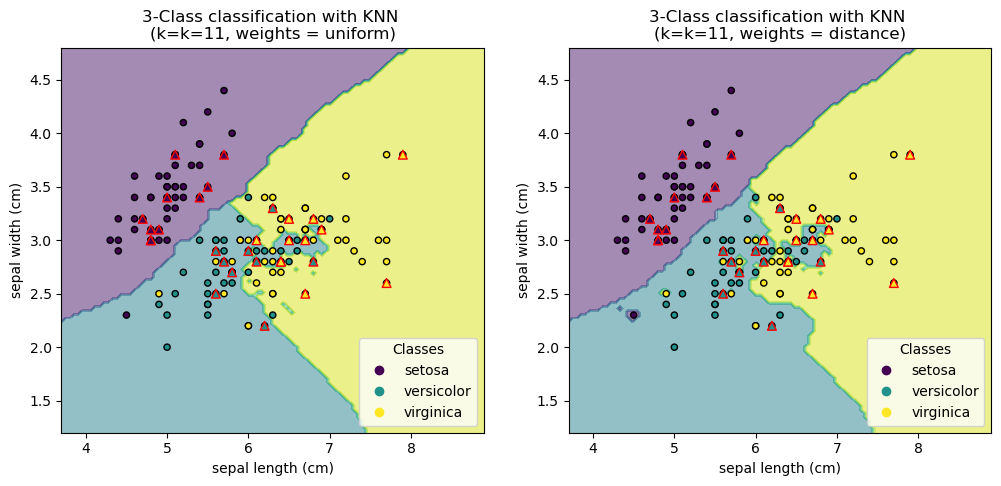

In [6]:
_, axs = plt.subplots(ncols=2, figsize=(12, 5))

 #[ (axs[0], "uniform"), (axs[1], "distance") ]
for ax, weights in zip(axs, ("uniform", "distance")): 
    clf.set_params(knn__weights = weights).fit(X_train, y_train)  #change KNN parameters

    disp = DecisionBoundaryDisplay.from_estimator( 
        clf, # trained model
        X_test,  # training data 
        grid_resolution=100, # number of points in the grid
        plot_method="contourf", # contour 等高线边界画图， pcolormesh 像素块画图 
        response_method="predict", #predict, predict_proba 概率预测, decision_function,auto  
        xlabel=iris.feature_names[0], # x-axis label
        ylabel=iris.feature_names[1], # y-axis label
        shading = "auto", # shading method
        alpha =0.5, # transparency of the contour
        ax=ax
    ) 
    scatter = disp.ax_.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolor="k", s=20) # scatter plot of the data points 
    # 
   
    disp.ax_.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test,
                 marker="^", edgecolor="red", s=40, label="Test")

    disp.ax_.legend( 
        scatter.legend_elements()[0],
        iris.target_names,
        title="Classes",
        loc="lower right", 
    )
    _ = disp.ax_.set_title( 
        f"3-Class classification with KNN \n(k=k={clf[-1].n_neighbors}, weights = {weights})"
    ) 
plt.show()